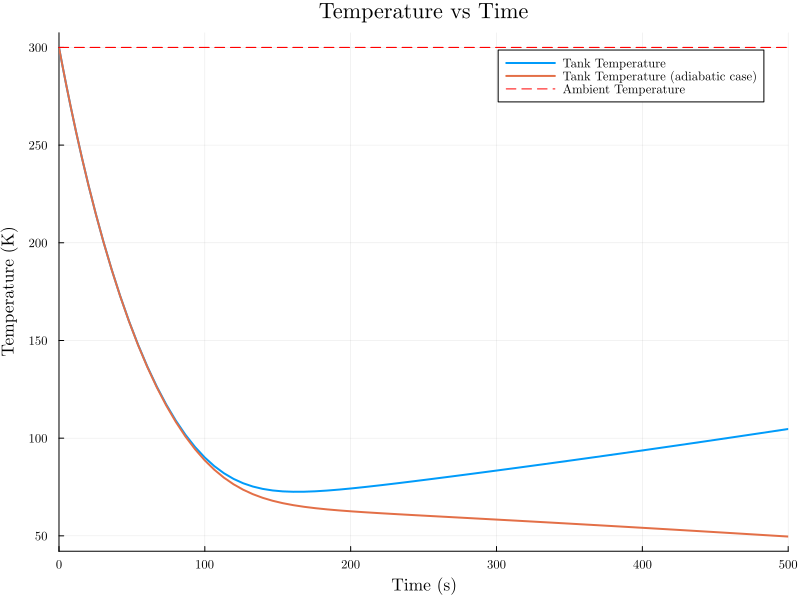

In [89]:
using DifferentialEquations, Plots

# Define the ODE function
function f!(du, u, p, t)

    # Differential variables
    T, n, Tad = u

    # Parameters
    C0, A0, f_gamma, pu, n0, R, V, h0, A, Tu, Cv = p

    # Algebraic equations
    pr = n * R * T / V
    n_dot = C0 * A0 * f_gamma * (pr - pu)/T
    Q = h0 * A * (T - Tu)

    # Differential equations
    du[1] = -Q/(n * Cv) - n_dot * R * T / (n * Cv)  # dT/dt
    du[2] = -n_dot  # dn/dt
    du[3] = - n_dot * R * T / (n * Cv)  # Tad (not used in this example)
end

T0 = 300.0  # Initial temperature in K
Tu = 300.0 # Ambient temperature in K
p_i = 2e7 # Initial pressure in Pa
V = 0.1 # Volume in m^3
Cp = 29 # J/(mol*K)
R = 8.314 # J/(mol*K)
Cv = Cp - R # J/(mol*K)
C0 = 0.8 # Orifice coefficient
A0 = 1e-3 # Orifice area in m^2
f_gamma = 0.5 # Heat capacity function
pu = 1e5 # Ambient pressure in Pa
n0 = p_i * V / (R * T0) # Initial moles from ideal gas law
h0 = 1.0 # Heat transfer coefficient in W/(m^2*K)
A = 0.2 # Surface area in m^2

# Initial conditions
u0 = [T0, n0, T0] # [T, n, Tad  ]

# Parameters
p = [C0, A0, f_gamma, pu, n0, R, V, h0, A, Tu, Cv]

# Time span
T_end = 500.0 # End time in seconds
tspan = (0.0, T_end)

# Define the ODE problem
prob = ODEProblem(f!, u0, tspan, p)
sol = solve(prob, Tsit5(), reltol=1e-6, abstol=1e-6)

# Saving results
T = sol[1, :]
n = sol[2, :]
Tad = sol[3, :]
p = n .* R .* T ./ V

# Plotting results
plot(legend=:topright, xlim=(0, T_end), xlabel="Time (s)", ylabel="Temperature (K)", title="Temperature vs Time", fontfamily="Computer Modern", size=(800, 600))
plot!(sol.t, T, label="Tank Temperature", lw=2)
plot!(sol.t, Tad, label="Tank Temperature (adiabatic case)", lw=2)
hline!([0, T_end], [Tu, Tu], linestyle=:dash, color=:red, label="Ambient Temperature")

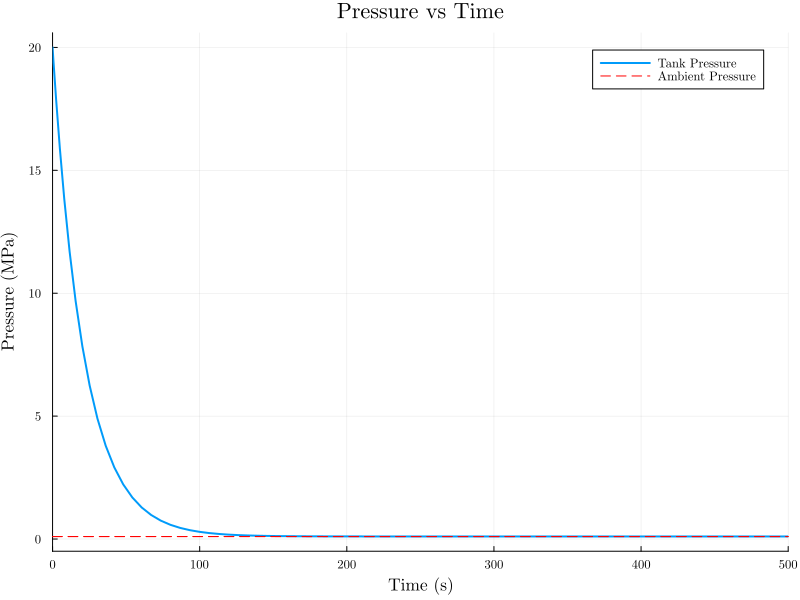

In [90]:
plot(sol.t, p./1e6, xlim=(0, T_end), xlabel="Time (s)", ylabel="Pressure (MPa)", title="Pressure vs Time", label="Tank Pressure", lw=2, fontfamily="Computer Modern", size=(800, 600))
hline!([0, T_end], [pu*1e-6, pu*1e-6], linestyle=:dash, color=:red, label="Ambient Pressure")